# Explore results of CH genes variants in gnomAD

### CH genes variants

From file: "CH_genes_variants_hg19.tsv"

Obtained by notebook: **"CHgenes_variantsGnomad_pysam_hg19"**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
### Open data

ch_variants = pd.read_csv("/home/sdemajo/CH_gnomad_2021_02/results/CH_genes_variants_hg19.tsv",
                          sep="\t", index_col=0)

ch_variants

,Chromosome,Position,rsID,REF,ALT,QUAL,FILTER,Gene,Transcript,Prot_Pos,AF,non_cancer_AF,controls_AF
0,1,1718771,rs747120803,T,C,4570.98,PASS,GNB1,ENST00000378609,341,0.000016,0.000017,0.000009
1,1,1718773,rs1362537090,G,A,314.39,PASS,GNB1,ENST00000378609,340,0.000004,0.000004,0.000009
3,1,1718806,rs750998849,T,C,1667.37,PASS,GNB1,ENST00000378609,329,0.000004,0.000004,0.000000
4,1,1718809,rs139152573,C,T,7962.49,PASS,GNB1,ENST00000378609,328,0.000036,0.000030,0.000018
6,1,1718827,rs766891832,G,A,2299.37,PASS,GNB1,ENST00000378609,322,0.000004,0.000004,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54157,X,123229260,rs750598294,G,A,1182.36,PASS,STAG2,ENST00000371145,1248,0.000005,0.000006,0.000012
54158,X,123229292,rs1230398678,A,T,3145.36,PASS,STAG2,ENST00000371145,1259,0.000005,0.000006,0.000000
54159,X,123229296,rs201262699,A,T,53165.35,PASS,STAG2,ENST00000371145,1260,0.000180,0.000157,0.000199
54160,X,123234427,rs1304348952,C,A,1266.82,PASS,STAG2,ENST00000371145,1263,0.000006,0.000006,0.000013


In [3]:
## 1. Number of variants for each gene
# (Non-normalized by size)
ch_variants["Gene"].value_counts()

KMT2D     4141
KMT2C     3272
NOTCH1    2296
ATM       2212
APC       2090
          ... 
GNB1       158
SDHAF2     142
U2AF1      106
NRAS        99
KRAS        73
Name: Gene, Length: 65, dtype: int64

In [4]:
ch_variants["Gene"].value_counts().head(50)

KMT2D     4141
KMT2C     3272
NOTCH1    2296
ATM       2212
APC       2090
MGA       2075
PTPRD     1648
TET2      1448
NF1       1336
ASXL1     1237
ARID2     1140
MYO5A     1113
CUX1       982
AFF3       971
RET        931
LZTR1      912
MRTFA      894
ABL2       839
ERCC2      795
GNAS       793
JAK2       767
EPHA3      750
CBL        667
DNMT3A     665
DNMT3B     658
DNM2       590
KDM5C      582
KDM6A      525
AR         502
CHEK2      489
TP63       474
FOXP1      468
MPL        467
ERF        466
SH2B3      463
STAT5B     398
SF3B1      392
ATE1       386
CALR       367
CTCF       361
PPM1D      352
RUNX1      345
RAD21      343
IDH2       342
MYCN       339
EZH2       336
IDH1       320
PPARG      309
STAG2      307
STAT3      304
Name: Gene, dtype: int64

Text(0.5, 0, 'Number of different variants')

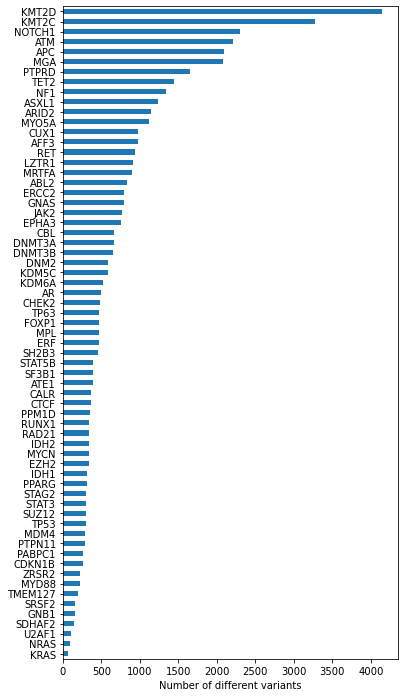

In [5]:
graph = ch_variants["Gene"].value_counts(ascending=True).plot.barh(figsize=(6,12))
graph.set_xlabel("Number of different variants")

# First genes
#graph = ch_variants["Gene"].value_counts(ascending=True)[40:65].plot.barh(figsize=(6,5))
#graph.set_xlabel("Number of different variants")

In [6]:
## 2. Maximum/Minimum allel frequency all genes

ch_variants.sort_values(by = ["AF"], ascending=False)

,Chromosome,Position,rsID,REF,ALT,QUAL,FILTER,Gene,Transcript,Prot_Pos,AF,non_cancer_AF,controls_AF
5189,11,108183167,rs659243,A,G,7.677129e+08,PASS,ATM,ENST00000278616,1983,1.000000,1.000000,1.000000
26715,2,100343557,rs4851223,C,T,3.022600e+08,PASS,AFF3,ENST00000409579,358,0.999988,0.999987,0.999991
28481,20,31022959,rs6058694,T,C,1.102705e+09,PASS,ASXL1,ENST00000375687,810,0.999988,0.999987,1.000000
7005,12,25368462,rs4362222,C,T,5.964972e+08,PASS,KRAS,ENST00000256078,161,0.999614,0.999603,0.999598
21636,17,74732507,rs237058,A,G,4.464714e+08,PASS,SRSF2,ENST00000392485,NaN,0.997716,0.997741,0.997639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30732,20,57478812,rs375196529,G,A,5.070350e+03,PASS,GNAS,ENST00000371100,118,0.000004,0.000004,0.000000
30736,20,57478823,rs369201934,G,C,2.840237e+04,PASS,GNAS,ENST00000371100,122,0.000004,0.000004,0.000009
34551,3,38182767,rs893672462,C,T,2.521350e+03,PASS,MYD88,ENST00000421516,NaN,0.000004,0.000004,0.000000
34549,3,38182761,rs767079920,C,T,1.615350e+03,PASS,MYD88,ENST00000421516,NaN,0.000004,0.000000,0.000000


In [7]:
# Maximum 50
ch_variants.sort_values(by = ["AF"], ascending=False).head(n=50)

,Chromosome,Position,rsID,REF,ALT,QUAL,FILTER,Gene,Transcript,Prot_Pos,AF,non_cancer_AF,controls_AF
5189,11,108183167,rs659243,A,G,7.677129e+08,PASS,ATM,ENST00000278616,1983,1.000000,1.000000,1.000000
26715,2,100343557,rs4851223,C,T,3.022600e+08,PASS,AFF3,ENST00000409579,358,0.999988,0.999987,0.999991
28481,20,31022959,rs6058694,T,C,1.102705e+09,PASS,ASXL1,ENST00000375687,810,0.999988,0.999987,1.000000
7005,12,25368462,rs4362222,C,T,5.964972e+08,PASS,KRAS,ENST00000256078,161,0.999614,0.999603,0.999598
21636,17,74732507,rs237058,A,G,4.464714e+08,PASS,SRSF2,ENST00000392485,NaN,0.997716,0.997741,0.997639
17181,15,52689526,rs2924130,T,C,7.925066e+08,PASS,MYO5A,ENST00000399231,397,0.991424,0.991498,0.990691
17214,15,52689631,rs1724577,T,G,6.868213e+08,PASS,MYO5A,ENST00000399231,362,0.968857,0.968792,0.965944
16894,15,52667552,rs2414145,G,A,6.608594e+08,PASS,MYO5A,ENST00000399231,842,0.959533,0.959584,0.955890
3400,10,123673339,rs10749435,T,C,3.001834e+08,PASS,ATE1,ENST00000224652,101,0.899615,0.898484,0.894335
3158,10,123596254,rs4237536,T,C,3.599031e+08,PASS,ATE1,ENST00000224652,412,0.895802,0.894579,0.891226


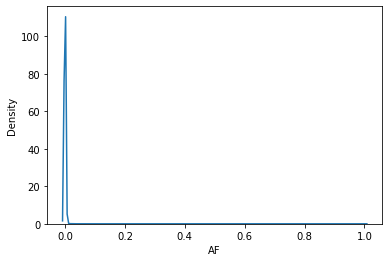

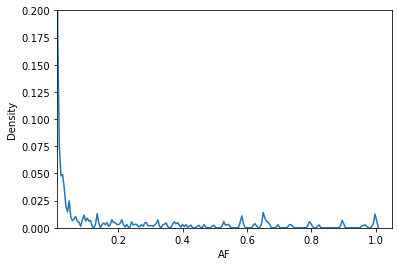

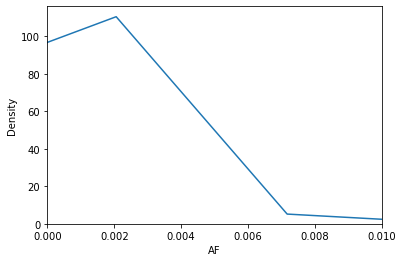

In [8]:
## 3. Density plots AF

# Full
sns.kdeplot(ch_variants["AF"])
plt.show()

# High AF
plt.xlim(0.01,1.05)
plt.ylim(0,0.2)
sns.kdeplot(ch_variants["AF"])
plt.show()

# Low AF
plt.xlim(0, 0.01)
sns.kdeplot(ch_variants["AF"])
plt.show()

In [9]:
# AF frequencies
print(sum(ch_variants["AF"] > 0.5))
print(sum(ch_variants["AF"] > 0.1))
print(sum(ch_variants["AF"] > 0.01))
print(sum(ch_variants["AF"] > 0.001))
print(sum(ch_variants["AF"] > 0.0001))
print(sum(ch_variants["AF"] > 0.00001))
print(sum(ch_variants["AF"] < 0.00001))

#print(sum(ch_variants[(ch_variants["AF"] <= 0.5) & (ch_variants["AF"] > 0.1)]["AF"]))

39
92
208
744
2772
15720
32243


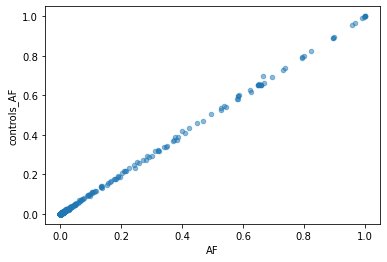

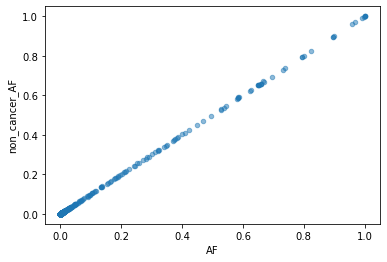

In [10]:
## 4. Scatter plots


ch_variants.plot.scatter(x="AF", y="controls_AF", alpha=0.5)
plt.show()

ch_variants.plot.scatter(x="AF", y="non_cancer_AF", alpha=0.5)
plt.show()


In [11]:
## 5. Mean AF per gene
ch_variants.groupby(["Gene"])["AF"].mean().sort_values(ascending=False)

Gene
KRAS      0.013725
SRSF2     0.011968
ATE1      0.006188
SF3B1     0.005159
MYO5A     0.003143
            ...   
PTPN11    0.000041
MYCN      0.000040
MYD88     0.000040
SDHAF2    0.000027
NRAS      0.000015
Name: AF, Length: 65, dtype: float64

Text(0.5, 0, 'Mean AF')

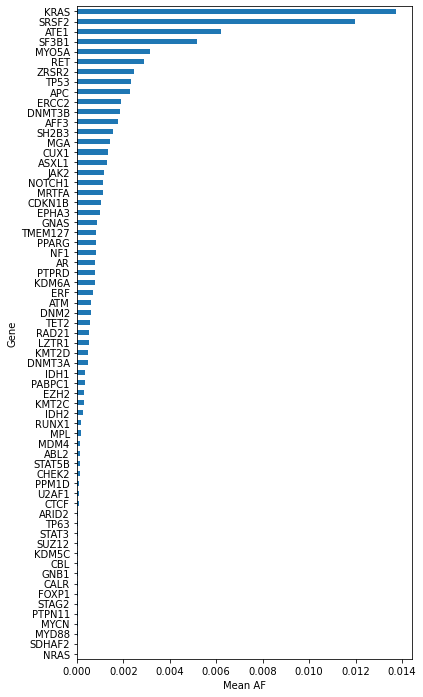

In [12]:
graph = ch_variants.groupby(["Gene"])["AF"].mean().sort_values().plot.barh(figsize=(6,12))
graph.set_xlabel("Mean AF")

In [13]:
## 3. Median AF per gene
ch_variants.groupby(["Gene"])["AF"].median().sort_values(ascending=False)

Gene
AR         0.000011
NOTCH1     0.000008
MRTFA      0.000008
SH2B3      0.000008
TMEM127    0.000008
             ...   
TP63       0.000004
PTPN11     0.000004
STAT3      0.000004
CBL        0.000004
NRAS       0.000004
Name: AF, Length: 65, dtype: float64

Text(0.5, 0, 'Median AF')

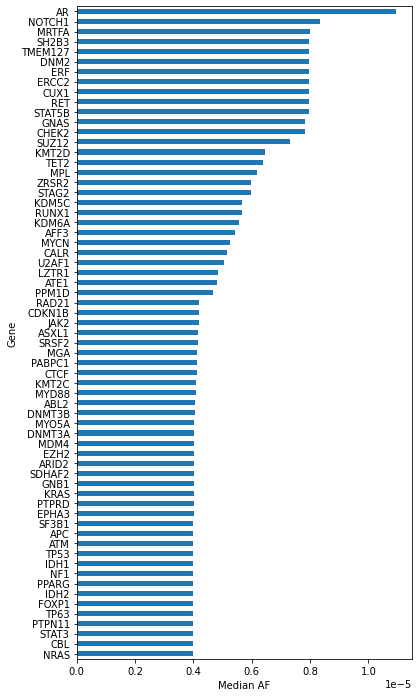

In [14]:
graph = ch_variants.groupby(["Gene"])["AF"].median().sort_values().plot.barh(figsize=(6,12))
graph.set_xlabel("Median AF")

## GET CANONICAL TRANSCRIPTS TO GET THE LENGTH

In [15]:
### Open file with exons per gene

ch_genes_exons19 = pd.read_csv("/home/sdemajo/CH_gnomad_2021_02/results/CH_genes_exons_hg19.tsv", sep="\t")
ch_genes_exons19

,Unnamed: 0,CHROMOSOME,START,END,STRAND,GENE_ID,TRANSCRIPT_ID,SYMBOL
0,433,1,1718770,1718876,-,ENSG00000078369,ENST00000378609,GNB1
1,434,1,1720492,1720708,-,ENSG00000078369,ENST00000378609,GNB1
2,435,1,1721834,1722035,-,ENSG00000078369,ENST00000378609,GNB1
3,436,1,1724684,1724750,-,ENSG00000078369,ENST00000378609,GNB1
4,437,1,1735858,1736020,-,ENSG00000078369,ENST00000378609,GNB1
...,...,...,...,...,...,...,...,...
1141,190020,X,123224425,123224614,+,ENSG00000101972,ENST00000371145,STAG2
1142,190021,X,123224704,123224814,+,ENSG00000101972,ENST00000371145,STAG2
1143,190022,X,123227868,123227994,+,ENSG00000101972,ENST00000371145,STAG2
1144,190023,X,123229222,123229299,+,ENSG00000101972,ENST00000371145,STAG2


In [16]:
### Get length of exons
ch_genes_exons19["EXON_LENGTH"] = ch_genes_exons19["END"] - ch_genes_exons19["START"] + 1

ch_genes_exons19

,Unnamed: 0,CHROMOSOME,START,END,STRAND,GENE_ID,TRANSCRIPT_ID,SYMBOL,EXON_LENGTH
0,433,1,1718770,1718876,-,ENSG00000078369,ENST00000378609,GNB1,107
1,434,1,1720492,1720708,-,ENSG00000078369,ENST00000378609,GNB1,217
2,435,1,1721834,1722035,-,ENSG00000078369,ENST00000378609,GNB1,202
3,436,1,1724684,1724750,-,ENSG00000078369,ENST00000378609,GNB1,67
4,437,1,1735858,1736020,-,ENSG00000078369,ENST00000378609,GNB1,163
...,...,...,...,...,...,...,...,...,...
1141,190020,X,123224425,123224614,+,ENSG00000101972,ENST00000371145,STAG2,190
1142,190021,X,123224704,123224814,+,ENSG00000101972,ENST00000371145,STAG2,111
1143,190022,X,123227868,123227994,+,ENSG00000101972,ENST00000371145,STAG2,127
1144,190023,X,123229222,123229299,+,ENSG00000101972,ENST00000371145,STAG2,78


In [17]:
### Get length of all exons (=CDS)

gene_size = ch_genes_exons19.groupby("SYMBOL")["EXON_LENGTH"].sum().sort_values(ascending=False)
gene_size

SYMBOL
KMT2D     16614
KMT2C     14736
MGA        9198
ATM        9171
APC        8532
          ...  
SRSF2       666
CDKN1B      597
NRAS        570
KRAS        570
SDHAF2      501
Name: EXON_LENGTH, Length: 65, dtype: int64

In [38]:
### Create data frame with number of variants and size for each gene

# Series with number of variants per gene
gene_variants = ch_variants["Gene"].value_counts()

# Create data frame
gene_variants_size = pd.concat([gene_variants, gene_size], axis=1).reset_index()
gene_variants_size.columns = ["Gene name", "Number variants", "Gene lenght (CDS)"]
gene_variants_size.head(10).style.set_properties(**{'text-align':'center'})

#df = df.reset_index()
#df.columns = ['CH driver gene','Protein position','Number mutations']
#df.head(10).style.set_properties(**{'text-align':'center'})


,Gene name,Number variants,Gene lenght (CDS)
0,KMT2D,4141,16614
1,KMT2C,3272,14736
2,NOTCH1,2296,7668
3,ATM,2212,9171
4,APC,2090,8532
5,MGA,2075,9198
6,PTPRD,1648,5739
7,TET2,1448,6009
8,NF1,1336,8520
9,ASXL1,1237,4626


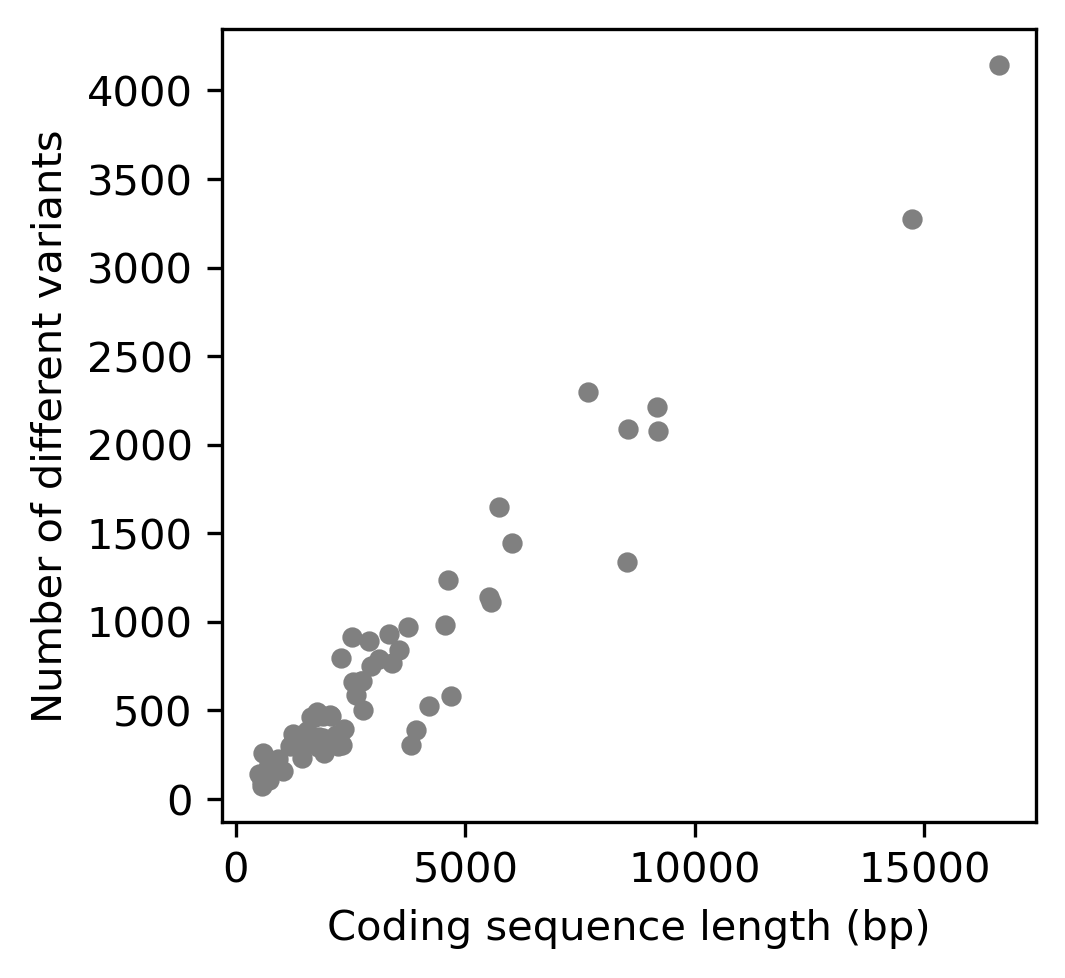

In [46]:
### PLOT VARIANT NUMBER VS LENGTH

plt.rcParams["figure.figsize"] = (3.5,3.5)
graph = gene_variants_size.plot.scatter(x="Gene lenght (CDS)", y="Number variants", c="gray", s=15)
graph.set_xlabel("Coding sequence length (bp)")
graph.set_ylabel("Number of different variants")
plt.show()